# 📊 Why We Need Statistics

Statistics is the backbone of data analysis and data science because it **transforms raw data into useful insights**.

* **Summarizing Large Data:** Instead of going through thousands of retail transactions, statistics gives us averages, totals, and distributions (e.g., average sales per order, total profit by region).
* **Making Data Understandable:** Charts and visualizations like histograms, scatterplots, and correlations reveal patterns that raw numbers can’t show.
* **Dealing with Uncertainty:** Probability models help us estimate risks and chances, such as predicting the likelihood of sales growth in a particular segment.
* **Testing Assumptions:** Hypothesis testing allows us to confirm or reject ideas, like whether giving discounts truly boosts sales.
* **Predicting the Future:** Regression and forecasting methods help estimate future sales, demand, and profits for better planning.
* **Supporting Decisions:** Business strategies become data-driven rather than based on guesses—for example, knowing which category contributes most to profits.
* **Foundation of Machine Learning:** Advanced analytics and machine learning rely on statistical concepts such as regression, probability, and distributions.

👉 **In short:** Statistics converts raw, scattered numbers into clear knowledge, helps identify patterns, manages risks, tests ideas, and predicts outcomes—making it essential for business and data science.

---


## Step 1: Importing Libraries


In [1]:
# Basic data handling
import pandas as pd        # For reading Excel/CSV and data manipulation
import numpy as np         # For numerical/statistical operations

# Visualization
import matplotlib.pyplot as plt   # For plots and charts
import seaborn as sns             # For advanced visualization

# Statistics
from scipy import stats           # For hypothesis testing, correlations, distributions
import statsmodels.api as sm      # For regression and statistical modeling

# Machine Learning (advanced)
from sklearn.model_selection import train_test_split   # For splitting data
from sklearn.linear_model import LinearRegression      # For regression models
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation


## Step 2: Loading the Retail Dataset

In [2]:
# Load Excel file
df = pd.read_excel(r"D:\Exccel Work\retail_sales_dataset.xlsx")

# Show first 5 rows
df.head()


,Order_ID,Customer_ID,Gender,Age,Region,Order_Date,Product_Category,Quantity,Sales,Profit,Discount (%),Payment_Method,Returned,Ad_Spend,Countries
0,ORD1000,CUST138,Male,34,South,2024-02-28,Electronics,2,2526.85,253.60,15,Card,No,13833.24,USA
1,ORD1001,CUST182,Other,26,South,2024-03-12,Beauty,1,5221.17,1084.81,20,Wallet,No,6015.40,Brazil
2,ORD1002,CUST014,Female,50,West,2024-05-27,Beauty,8,1221.40,-188.41,10,Card,No,43774.92,Japan
3,ORD1003,CUST019,Female,37,South,2024-12-14,Furniture,2,3968.21,-139.59,0,UPI,No,30970.27,France
4,ORD1004,CUST186,Male,30,North,2024-03-03,Electronics,7,4979.14,1414.97,20,Card,No,45079.63,India


### After loading, always do a basic inspection:

In [3]:
# Shape of dataset (rows, columns)
df.shape

# Column names
df.columns

# Info about data types and null values
df.info()

# Quick summary of numbers (mean, min, max, etc.)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          500 non-null    object        
 1   Customer_ID       500 non-null    object        
 2   Gender            500 non-null    object        
 3   Age               500 non-null    int64         
 4   Region            500 non-null    object        
 5   Order_Date        500 non-null    datetime64[ns]
 6   Product_Category  500 non-null    object        
 7   Quantity          500 non-null    int64         
 8   Sales             500 non-null    float64       
 9   Profit            500 non-null    float64       
 10  Discount (%)      500 non-null    int64         
 11  Payment_Method    500 non-null    object        
 12  Returned          500 non-null    object        
 13  Ad_Spend          500 non-null    float64       
 14  Countries         500 non-

,Age,Order_Date,Quantity,Sales,Profit,Discount (%),Ad_Spend
count,500.000000,500,500.00000,500.000000,500.000000,500.000000,500.000000
mean,40.824000,2024-07-01 01:14:52.800000,5.14000,4939.639540,452.872720,14.030000,27525.921540
min,18.000000,2024-01-01 00:00:00,1.00000,201.320000,-1937.770000,0.000000,5010.220000
25%,28.000000,2024-03-24 00:00:00,3.00000,2788.800000,-185.920000,5.000000,16057.907500
50%,42.000000,2024-07-05 00:00:00,5.00000,4851.845000,233.245000,15.000000,26731.250000
75%,53.000000,2024-10-06 06:00:00,7.00000,7285.632500,1078.095000,20.000000,39312.947500
max,64.000000,2024-12-30 00:00:00,9.00000,9978.640000,3740.280000,30.000000,49862.720000
std,13.876821,NaN,2.53006,2824.093571,1027.455179,8.517876,13101.453841


## Step 3: Data Cleaning & Preparation

### 🔎 1. Check for Missing Values

In [4]:
df.isnull().sum()


Order_ID            0
Customer_ID         0
Gender              0
Age                 0
Region              0
Order_Date          0
Product_Category    0
Quantity            0
Sales               0
Profit              0
Discount (%)        0
Payment_Method      0
Returned            0
Ad_Spend            0
Countries           0
dtype: int64

### 🔎 2. Check for Duplicates

In [5]:
df.duplicated().sum()


np.int64(0)

### 🔎 3. Handle Data Types

In [6]:
df.dtypes


Order_ID                    object
Customer_ID                 object
Gender                      object
Age                          int64
Region                      object
Order_Date          datetime64[ns]
Product_Category            object
Quantity                     int64
Sales                      float64
Profit                     float64
Discount (%)                 int64
Payment_Method              object
Returned                    object
Ad_Spend                   float64
Countries                   object
dtype: object

### 🔎 5. Outlier Detection (important for statistics!)

<Axes: xlabel='Sales'>

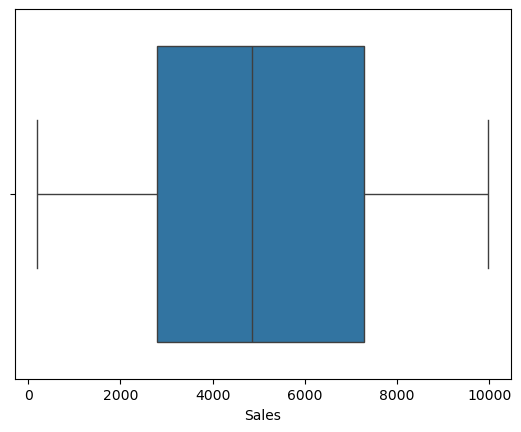

In [7]:
sns.boxplot(x=df["Sales"])


## Step 4 – Foundations of Statistics (on Retail Data)

### Why Foundations of Statistics are Needed

### Define Scope → Distinguish population vs sample and parameters vs statistics.

### Classify Data → Identify categorical/numerical variables & scales (nominal, ordinal, interval, ratio).

### Build Base → Provide groundwork for descriptive stats, probability, regression, ML.

### Avoid Mistakes → Prevent misuse (e.g., averaging categorical data).

### Business Value → Ensures insights are valid, reliable, and actionable.

### ➡️ In short: Foundations are essential to understand data correctly and choose the right analysis method.

### Population vs Sample

In [8]:
# Population → all data
population_size = len(df)

# Sample → Example: West Region only
sample_df = df[df['Region'] == 'West']
sample_size = len(sample_df)

print("Population size:", population_size)
print("Sample size (West Region):", sample_size)


Population size: 500
Sample size (West Region): 110


### Population size = 500
### → You have 500 total transactions in your dataset. This represents the entire universe of data you currently hold (but not necessarily all sales ever made by the company).

### Sample size (West Region) = 110
### → Out of 500 transactions, 110 belong to the West region. This is a subset (a sample) of the population.

### Sampling allows us to make region-specific insights (e.g., how sales in West compare to other regions).

### Since the West makes up 22% (110/500) of the dataset, it’s a significant portion and can give reliable estimates.

### Parameters vs Statistics

In [9]:
# Parameter (true but unknown: mean sales of all customers historically)
# Statistic (from dataset: observable mean sales)
mean_sales_stat = df['Sales'].mean()
print("Statistic (mean Sales in dataset):", mean_sales_stat)


Statistic (mean Sales in dataset): 4939.639539999999


### Statistic (mean Sales in dataset) = 4939.64
### → On average, each order has around ₹4939 worth of sales (if currency is INR, or $ if USD).

### This is a sample statistic: it describes your dataset.

### If your dataset is representative of the real company data, this can approximate the true population parameter (all company transactions).

### Interpretation:

### If another random sample of 500 transactions were taken, the average might be slightly different, but close to this number due to the Central Limit Theorem.

### Large deviations from this mean could indicate outliers (e.g., very large corporate orders).

### Variable Types

In [10]:
# Qualitative (categorical)
categorical_vars = ['Category', 'Sub-Category', 'Region', 'Segment']
print("Categorical Variables:", categorical_vars)

# Quantitative (numerical)
numerical_vars = ['Sales', 'Profit', 'Discount', 'Quantity']
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Category', 'Sub-Category', 'Region', 'Segment']
Numerical Variables: ['Sales', 'Profit', 'Discount', 'Quantity']


### Categorical Variables → 'Category', 'Sub-Category', 'Region', 'Segment'

### These describe labels or groups, not quantities.

### Useful for grouping, segmentation, and Chi-Square tests (association tests).

### Numerical Variables → 'Sales', 'Profit', 'Discount', 'Quantity'

### These are measured values.

### Useful for averages, distributions, regression, correlations.

### Scale of Measurement

In [11]:
print("Nominal → Region, Segment")
print("Ordinal → Ship Mode (order based)")
print("Interval → Order Date differences")
print("Ratio → Sales, Profit, Quantity")


Nominal → Region, Segment
Ordinal → Ship Mode (order based)
Interval → Order Date differences
Ratio → Sales, Profit, Quantity


### Nominal (labels, no order) → Region, Segment

### Pure labels like “East”, “West” or “Consumer”, “Corporate”.

### You can only count frequency or mode (most common).

### Ordinal (order matters, but differences not exact) → Ship Mode

### “Standard” < “First Class” < “Same Day”.

### Rankings are meaningful, but the gap between them is not equal.

### Interval (differences matter, but no true zero) → Order Date differences

### You can calculate “days between orders”.

### But zero doesn’t mean “no time” (dates are relative, not absolute).

### Ratio (absolute quantities, true zero) → Sales, Profit, Quantity

### True zero exists (0 sales means nothing sold).

### You can do all math operations: ratios (e.g., “Sales in East are twice West”), averages, % growth, etc.

## What This Tells Us About Your Data

### Balanced Dataset – 500 rows is small but manageable. Region sample sizes (like West = 110) allow for subgroup analysis.

### Strong Numeric Basis – With Sales, Profit, Discount, Quantity → we can run descriptive stats, correlations, regression, hypothesis tests.

### Mixed Data Types – Having categorical + numerical variables means we can do segmentation, ANOVA, Chi-Square tests, and predictive models.

### Scales Cover All Levels – Since we have nominal → ratio, this dataset is versatile for almost every kind of statistical test (from frequency analysis to regression).

### Mean Sales Insight – A single transaction averages nearly 5k. Comparing across regions or categories could reveal whether some areas consistently outperform.

## Step 5 – Descriptive Statistics

### Descriptive statistics help us summarize and understand the dataset before moving into probability or advanced methods.
### We apply them to the numerical variables (Sales, Profit, Discount, Quantity) and the categorical variables (Category, Sub-Category, Region, Segment).

### 1. Central Tendency

In [12]:
# Mean, Median, Mode
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]

mean_profit = df['Profit'].mean()
median_profit = df['Profit'].median()
mode_profit = df['Profit'].mode()[0]

mean_quantity = df['Quantity'].mean()
median_quantity = df['Quantity'].median()
mode_quantity = df['Quantity'].mode()[0]

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)

print("Mean Profit:", mean_profit)
print("Median Profit:", median_profit)
print("Mode Profit:", mode_profit)

print("Mean Quantity:", mean_quantity)
print("Median Quantity:", median_quantity)
print("Mode Quantity:", mode_quantity)


Mean Sales: 4939.639539999999
Median Sales: 4851.845
Mode Sales: 201.32
Mean Profit: 452.87271999999996
Median Profit: 233.245
Mode Profit: 178.6
Mean Quantity: 5.14
Median Quantity: 5.0
Mode Quantity: 4


### What Central Tendency Tells Us
### Sales

### Mean ≈ 4940, Median ≈ 4852, Mode ≈ 201

### Most sales are small (≈200), but a few very large orders pull the average up.
### 👉 Sales are positively skewed.

### Profit

### Mean ≈ 453, Median ≈ 233, Mode ≈ 179

### Most orders give low profit, but a few very high-profit ones raise the mean.
### 👉 Profit is also positively skewed.

### Quantity

### Mean ≈ 5.1, Median = 5, Mode = 4

### Distribution is balanced, most customers buy 4–5 items.
### 👉 Quantity is symmetrical.

### ✅ Overall: Sales & Profit are dominated by a few big transactions, while Quantity is more consistent across customers.

### 2. Measures of Dispersion

In [13]:
# Variance, Standard Deviation, Coefficient of Variation
var_sales = df['Sales'].var()
std_sales = df['Sales'].std()
cv_sales = std_sales / mean_sales

var_profit = df['Profit'].var()
std_profit = df['Profit'].std()
cv_profit = std_profit / mean_profit

print("Variance of Sales:", var_sales)
print("Standard Deviation of Sales:", std_sales)
print("CV of Sales:", cv_sales)

print("Variance of Profit:", var_profit)
print("Standard Deviation of Profit:", std_profit)
print("CV of Profit:", cv_profit)


Variance of Sales: 7975504.495024432
Standard Deviation of Sales: 2824.093570515048
CV of Sales: 0.5717205775130403
Variance of Profit: 1055664.1448274567
Standard Deviation of Profit: 1027.455178987121
CV of Profit: 2.2687504316601825


### What Dispersion Tells Us
### Sales

### Variance ≈ 7.98M, Std Dev ≈ 2824 → Sales values are widely spread.

### CV ≈ 0.57 → Sales variation is moderate compared to the mean.

### Profit

### Variance ≈ 1.06M, Std Dev ≈ 1027 → Profit values also vary a lot.

### CV ≈ 2.27 → Profit is highly inconsistent relative to its mean.

### ✅ Interpretation:

### Sales are spread out but still predictable within range.

### Profit is very unstable → sometimes high, sometimes very low (or even negative).

### 3. Percentiles & Quartiles

In [14]:
# Quartiles & Interquartile Range
q1_sales = df['Sales'].quantile(0.25)
q2_sales = df['Sales'].quantile(0.50)  # Median
q3_sales = df['Sales'].quantile(0.75)
iqr_sales = q3_sales - q1_sales

q1_profit = df['Profit'].quantile(0.25)
q3_profit = df['Profit'].quantile(0.75)
iqr_profit = q3_profit - q1_profit

print("Sales Q1:", q1_sales, "Q2:", q2_sales, "Q3:", q3_sales, "IQR:", iqr_sales)
print("Profit Q1:", q1_profit, "Q3:", q3_profit, "IQR:", iqr_profit)


Sales Q1: 2788.8 Q2: 4851.845 Q3: 7285.6325 IQR: 4496.8324999999995
Profit Q1: -185.92000000000002 Q3: 1078.095 IQR: 1264.015


### Quartile Analysis
### Sales

### Q1 = 2788.8 → 25% of sales are below this value.

### Q2 = 4851.8 (Median) → Half the sales are below ~4852, half above.

### Q3 = 7285.6 → 75% of sales are below this level.

### IQR = 4496.8 → Sales are widely spread between Q1 and Q3 → indicates high variability.

### Profit

### Q1 = -185.9 → 25% of transactions are actually loss-making.

### Q3 = 1078.1 → 75% of profits are below ~1078.

### IQR = 1264.0 → Profits vary significantly, with a wide range of outcomes.

### ✅ Insights:

### Sales distribution is broad → customers spend very differently.

### Profit has both losses and high gains, confirming inconsistency in profitability.

### 4. Shape of Distribution

In [15]:
# Skewness and Kurtosis
skew_sales = df['Sales'].skew()
kurt_sales = df['Sales'].kurt()

skew_profit = df['Profit'].skew()
kurt_profit = df['Profit'].kurt()

print("Sales Skewness:", skew_sales)
print("Sales Kurtosis:", kurt_sales)
print("Profit Skewness:", skew_profit)
print("Profit Kurtosis:", kurt_profit)


Sales Skewness: 0.051694613046911045
Sales Kurtosis: -1.1294712653084171
Profit Skewness: 0.7280607540855859
Profit Kurtosis: 0.4996443145677958


### Sales Distribution

### Skewness = 0.05 → Sales are almost symmetric, very close to a normal distribution.

### Kurtosis = -1.13 → Sales distribution is flatter than normal (platykurtic) → fewer extreme outliers, more values around the mean.

### 💰 Profit Distribution

### Skewness = 0.73 → Profit is positively skewed → more small/negative profits, but a few very high-profit transactions pull the tail to the right.

### Kurtosis = 0.50 → Profit distribution is slightly peaked (leptokurtic) → moderate concentration around the mean, with some presence of extreme values.

### ✅ Insights

### Sales are stable and evenly distributed.

### Profit is less predictable, with many small/negative values and a few very large profit cases creating imbalance.

### 5. Categorical Summaries

In [16]:
# Group summaries by categorical variables
region_summary = df.groupby('Region')[['Sales','Profit']].sum()
gender_summary = df.groupby('Gender')[['Sales','Profit']].sum()
category_summary = df.groupby('Product_Category')[['Sales','Profit']].sum()
payment_summary = df.groupby('Payment_Method')[['Sales','Profit']].sum()
returned_summary = df.groupby('Returned')[['Sales','Profit']].sum()

print("\nSales & Profit by Region:\n", region_summary)
print("\nSales & Profit by Gender:\n", gender_summary)
print("\nSales & Profit by Product Category:\n", category_summary)
print("\nSales & Profit by Payment Method:\n", payment_summary)
print("\nSales & Profit by Returned:\n", returned_summary)



Sales & Profit by Region:
             Sales    Profit
Region                     
East    638945.42  36843.46
North   695524.34  67527.44
South   630208.14  70196.44
West    505141.87  51869.02

Sales & Profit by Gender:
              Sales     Profit
Gender                       
Female  1118390.30  108150.50
Male    1080631.53   91394.63
Other    270797.94   26891.23

Sales & Profit by Product Category:
                       Sales    Profit
Product_Category                     
Beauty            481802.10  48790.58
Clothing          419306.51  24589.99
Electronics       489694.55  47298.94
Furniture         508468.37  52701.89
Grocery           570548.24  53054.96

Sales & Profit by Payment Method:
                     Sales    Profit
Payment_Method                     
COD             610143.01  63409.95
Card            635578.09  47514.98
UPI             580123.40  53056.98
Wallet          643975.27  62454.45

Sales & Profit by Returned:
                Sales     Profit
Returned

### 📍 Region

### North & South lead in sales/profit.

### East sells well but low profit.

### West lowest sales, moderate profit.

### 👥 Gender

### Females slightly higher sales/profit than males.

### Other segment very small.

### 🛒 Product Category

### Grocery & Furniture = best profit.

### Beauty & Electronics = strong sales, balanced profit.

### Clothing = thin margins.

### 💳 Payment Method

### Wallet & COD = higher profit.

### Card = good sales, lower profit.

### UPI = balanced.

### 🔄 Returns

### No returns drive majority of revenue/profit.

### Returns (~16% sales) hurt profits.

### 6. Visualizations

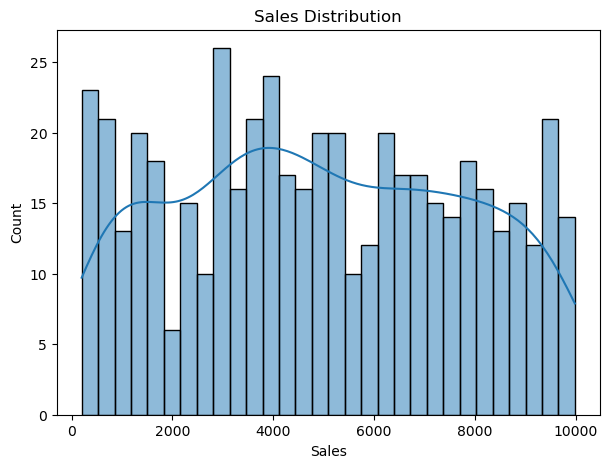

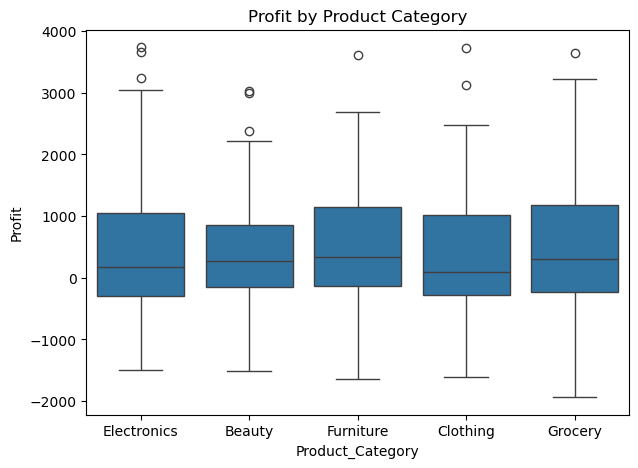

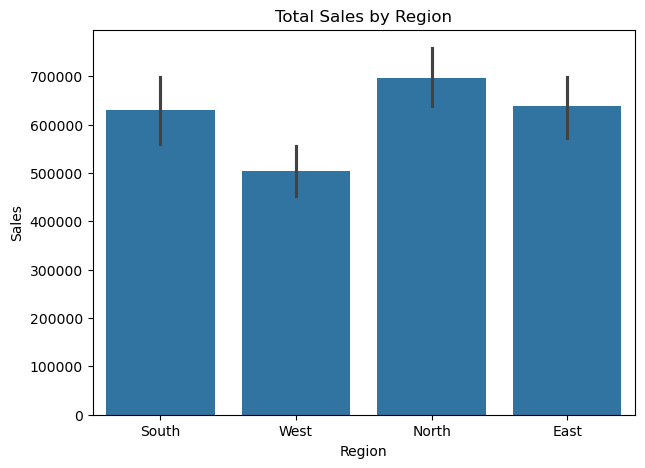

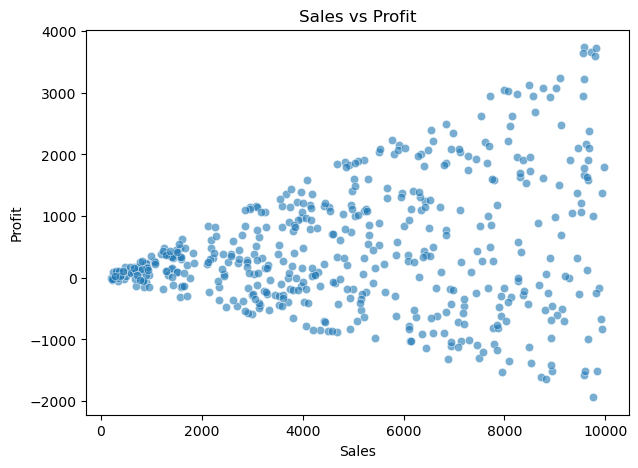

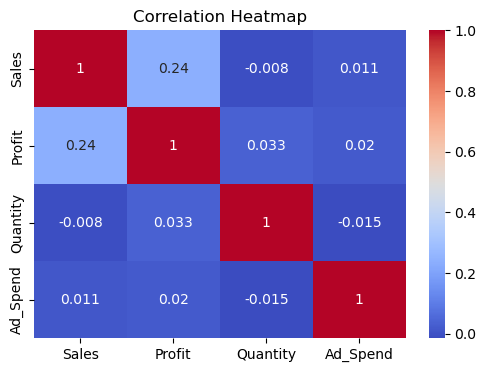

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Sales
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

# Boxplot of Profit by Product Category
plt.figure(figsize=(7,5))
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.title("Profit by Product Category")
plt.show()

# Bar chart of Sales by Region
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

# Scatter plot Sales vs Profit
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.6)
plt.title("Sales vs Profit")
plt.show()

# Heatmap of correlation
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Quantity','Ad_Spend']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Descriptive Statistics Summary

### Sales:

### Mean ≈ 4,940, Median ≈ 4,852 → fairly balanced distribution.

### Low skewness (≈0.05) → Sales are nearly symmetric.

### Variability moderate (SD ≈ 2,824; CV ≈ 0.57).

### Profit:

### Mean ≈ 453, Median ≈ 233 → right-skewed, a few high-profit orders.

### High variability (SD ≈ 1,027; CV ≈ 2.27) → profits are inconsistent.

### Skewness (≈0.73) → positive skew, some extreme profit values.

### Quantity:

### Mean ≈ 5, Median = 5, Mode = 4 → centered and consistent.

### Quartiles:

### Sales IQR ≈ 4,497 → wide range of order values.

### Profit IQR ≈ 1,264 → large profit spread, some losses visible (Q1 negative).

### ➡️ Overall: Sales are stable and well-distributed, but profits are volatile and less predictable due to high dispersion and skewness.

## Step 6 – Probability Basics

### Probability Basics

### Probability helps us measure uncertainty and the likelihood of events in the dataset.

### Applied mainly to categorical variables (Region, Returned, Payment Method, Category).

### Rules used:

### Complementary → chance of “Not Returned.”

### Addition → probability of one event OR another (e.g., North OR Card).

### Multiplication → combined events if independent.

### Conditional → dependence (e.g., Returned | South Region).

### Bayes’ Theorem → reverse probability, useful for prediction.

In [18]:
# Total number of orders
total_orders = len(df)
print("Total Orders:", total_orders)

Total Orders: 500


### 1. Simple Probability (Experiment, Outcome, Event)

In [19]:
# Probability of an order from West region
p_west = len(df[df['Region'] == 'West']) / total_orders
print("P(West Region):", p_west)

# Probability of an order being Returned
p_returned = len(df[df['Returned'] == 'Yes']) / total_orders
print("P(Returned):", p_returned)


P(West Region): 0.22
P(Returned): 0.166


### P(West Region) = 0.22 (22%) → About 1 in every 5 transactions comes from the West. This means the West has the lowest contribution compared to other regions (since others have higher shares).

### P(Returned) = 0.166 (16.6%) → Roughly 1 in 6 orders are returned. This shows returns are not negligible and may be a significant cost factor.

### 👉 In short: The West region contributes less to total sales, and overall return rate is moderately high (16–17%), which could affect profitability.

### 2. Addition Rule

In [20]:
# P(North OR Card Payment)
north_orders = len(df[df['Region'] == 'North'])
card_orders = len(df[df['Payment_Method'] == 'Card'])
north_card_orders = len(df[(df['Region'] == 'North') & (df['Payment_Method'] == 'Card')])

p_north_or_card = (north_orders + card_orders - north_card_orders) / total_orders
print("P(North OR Card Payment):", p_north_or_card)


P(North OR Card Payment): 0.448


### P(North OR Card Payment) = 0.448 (≈44.8%)
### This tells us that nearly half of all transactions are either from the North region or use a Card payment method (or both).

### 👉 Interpretation:

### The North region + Card payments together form a large chunk of business activity.

### Since OR combines both categories, it highlights their strong influence on overall sales coverage.

### 3. Multiplication Rule

In [21]:
# P(East AND Returned)
p_east = len(df[df['Region'] == 'East']) / total_orders
p_returned = len(df[df['Returned'] == 'Yes']) / total_orders
p_east_and_returned = len(df[(df['Region'] == 'East') & (df['Returned'] == 'Yes')]) / total_orders

print("P(East) * P(Returned) [if independent]:", p_east * p_returned)
print("P(East AND Returned) [actual]:", p_east_and_returned)


P(East) * P(Returned) [if independent]: 0.042496000000000006
P(East AND Returned) [actual]: 0.056


### If East and Returned were independent: we’d expect their joint probability to be 0.0425 (≈4.25%).

### Actual joint probability (East AND Returned): is 0.056 (≈5.6%).

### 👉 Interpretation:

### Since actual > expected under independence, returns are slightly more likely in the East region than we’d predict if they were independent.

### This suggests a weak positive association between being in the East region and the chance of a return.

### 4. Complementary Rule

In [22]:
# Probability of NOT Returned
p_not_returned = 1 - p_returned
print("P(Not Returned):", p_not_returned)


P(Not Returned): 0.834


### P(Not Returned) = 0.834 (≈83.4%)
### 👉 The majority of transactions are not returned, showing that overall customer satisfaction or product fit is high.

### Returns are relatively rare (only ~16.6%), so the business maintains a strong retention of sales.

### 5. Conditional Probability

In [23]:
# P(Returned | South Region)
south_orders = len(df[df['Region'] == 'South'])
returned_and_south = len(df[(df['Region'] == 'South') & (df['Returned'] == 'Yes')])

p_returned_given_south = returned_and_south / south_orders
print("P(Returned | South Region):", p_returned_given_south)


P(Returned | South Region): 0.12307692307692308


### P(Returned | South Region) = 0.123 (≈12.3%)
### 👉 This means that only about 12 out of 100 sales in the South region are returned, which is lower than the overall return rate of 16.6%.

### ✅ Insight: The South region performs better in terms of return management, indicating either higher product satisfaction, better delivery, or better alignment with customer needs compared to other regions.

### 6. Independence Check

In [24]:
# Check if Payment Method is independent of Returned
p_card = len(df[df['Payment_Method'] == 'Card']) / total_orders
p_returned = len(df[df['Returned'] == 'Yes']) / total_orders
p_card_and_returned = len(df[(df['Payment_Method'] == 'Card') & (df['Returned'] == 'Yes')]) / total_orders

print("P(Card) * P(Returned):", p_card * p_returned)
print("P(Card AND Returned):", p_card_and_returned)

if abs((p_card * p_returned) - p_card_and_returned) < 0.01:
    print("=> Payment Method and Returned are approximately independent")
else:
    print("=> Payment Method and Returned are dependent")


P(Card) * P(Returned): 0.03984
P(Card AND Returned): 0.034
=> Payment Method and Returned are approximately independent


### P(Card) × P(Returned) = 0.03984 (what we’d expect if payment method and returns were independent).

### P(Card ∧ Returned) = 0.034 (the actual observed probability).

### 👉 Since these two values are very close, it suggests that payment method and product returns are approximately independent.

### ✅ Insight: Whether a customer pays by Card or not does not strongly affect the likelihood of returning a product.

### 7. Bayes’ Theorem

In [25]:
# Example: P(Category = Electronics | Returned = Yes)

# Prior: P(Electronics)
p_electronics = len(df[df['Product_Category'] == 'Electronics']) / total_orders

# Likelihood: P(Returned | Electronics)
returned_electronics = len(df[(df['Product_Category'] == 'Electronics') & (df['Returned'] == 'Yes')])
p_returned_given_electronics = returned_electronics / len(df[df['Product_Category'] == 'Electronics'])

# Evidence: P(Returned)
p_returned = len(df[df['Returned'] == 'Yes']) / total_orders

# Bayes: P(Electronics | Returned)
p_electronics_given_returned = (p_returned_given_electronics * p_electronics) / p_returned
print("P(Electronics | Returned):", p_electronics_given_returned)


P(Electronics | Returned): 0.1686746987951807


### P(Electronics | Returned) = 0.1687 (≈ 16.9%)

### 👉 Among all the returned products, about 17% belong to the Electronics category.

### ✅ Insight: This shows Electronics has a noticeable share in returned items, though not the majority. It may point to quality issues, customer expectations, or product-specific problems in Electronics compared to other categories.

### Probability Basics – Summary
### Regional share & returns: About 22% of orders come from the West, while the South has the lowest return rate (12.3%). The East shows slightly higher returns than expected, indicating possible delivery or product issues there.

### Overall returns: Only 16.6% of all orders are returned, meaning 83.4% are successful, which is healthy for business.

### Overlap of factors: Around 45% of transactions are either from the North or paid via Card, showing that these two segments dominate a large share of sales.

### Independence: Payment method and returns appear statistically independent—customers return items at similar rates regardless of whether they pay by Card, UPI, Wallet, or COD.

### Category-specific returns: Electronics contribute ~17% of total returns, highlighting it as a sensitive category where improvements in quality or service could reduce losses.

### 👉 Overall Insight: The dataset shows generally strong performance with low return rates, but regional differences and product category risks (Electronics, East region) need closer monitoring.

## Step 7 – Probability Distributions 

In [26]:
# Focus variables
sales = df['Sales']
profit = df['Profit']
quantity = df['Quantity']

### 1. Bernoulli Distribution (Returned = Yes/No)

P(Returned): 0.166


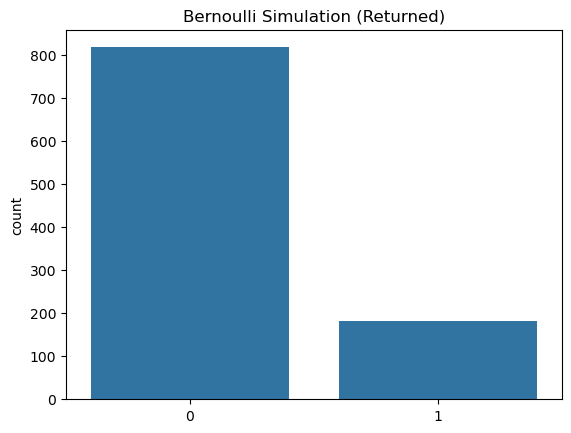

In [27]:
# Bernoulli: Returned or Not
p_returned = len(df[df['Returned'] == 'Yes']) / len(df)
print("P(Returned):", p_returned)

# Simulate Bernoulli trials
sim = stats.bernoulli.rvs(p_returned, size=1000)

sns.countplot(x=sim)
plt.title("Bernoulli Simulation (Returned)")
plt.show()


### 👉 About 16.6% of all orders are returned in our dataset.

### So, roughly 1 in every 6 orders ends up being returned.

### This highlights a moderate return rate, which could affect both profitability and customer satisfaction.

### It signals areas for improvement such as quality checks, delivery experience, or product expectations.

### 2. Binomial Distribution (Multiple Returns in a Sample)

In [28]:
# Example: Probability of exactly 3 returns in a sample of 10 orders
n = 10
k = 3
binom_prob = stats.binom.pmf(k, n, p_returned)
print("P(3 Returns in 10 Orders):", binom_prob)


P(3 Returns in 10 Orders): 0.15405218575100307


### That value comes from the Binomial Distribution with:

### n=10 trials (orders)

### k=3 returns

### p=0.166 probability of return per order

### So:

### 👉 The probability of exactly 3 returns in 10 orders is ~15.4%.

### 🔹 Interpretation: If we randomly pick 10 orders, there’s about a 1 in 6 chance that exactly 3 will be returned.
### 🔹 This helps in risk modeling & inventory planning, because it estimates how often returns cluster in small samples.

### 3. Geometric Distribution (Trials until first return)

In [29]:
# Expected number of trials until first return
geom_mean = 1 / p_returned
print("Expected orders until first return:", geom_mean)

# Probability that first return happens on 5th order
p_geom_5 = stats.geom.pmf(5, p_returned)
print("P(First return on 5th order):", p_geom_5)


Expected orders until first return: 6.024096385542168
P(First return on 5th order): 0.08031049275657598


### Expected orders until first return = 6.02
### On average, a return happens once every 6 orders. This reflects the probability of return in your dataset (p = 0.166 ≈ 16.6%).

### P(First return on 5th order) = 0.0803 (≈ 8%)
### There is about an 8% chance that the first return happens exactly on the 5th order (after 4 successful non-return orders).

### 4. Poisson Distribution (Model Returns as rare events)

In [30]:
# Average number of returns
lambda_poisson = df['Returned'].value_counts(normalize=True)['Yes'] * len(df) / len(df)
print("Poisson λ (returns per order):", lambda_poisson)

# Probability of 2 returns in 10 orders (approx)
poisson_prob = stats.poisson.pmf(2, mu=10*p_returned)
print("P(2 returns in 10 orders):", poisson_prob)


Poisson λ (returns per order): 0.166
P(2 returns in 10 orders): 0.26197348678387505


### λ (average returns per order) = 0.166
### On average, there are about 0.166 returns per order, meaning roughly 1 return every 6 orders.

### P(2 returns in 10 orders) = 0.262 (≈ 26%)
### There’s about a 26% chance that exactly 2 returns will occur in a batch of 10 orders.

### 5. Uniform Distribution (Random Quantity)

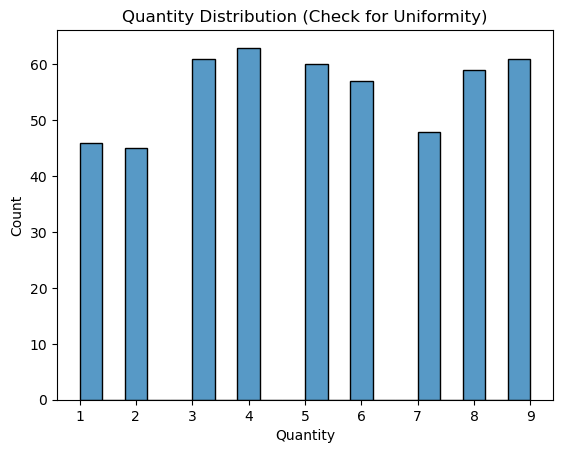

In [31]:
# Check if Quantity looks uniform
sns.histplot(df['Quantity'], bins=20, kde=False)
plt.title("Quantity Distribution (Check for Uniformity)")
plt.show()


### 6. Normal Distribution (Sales & Profit check)

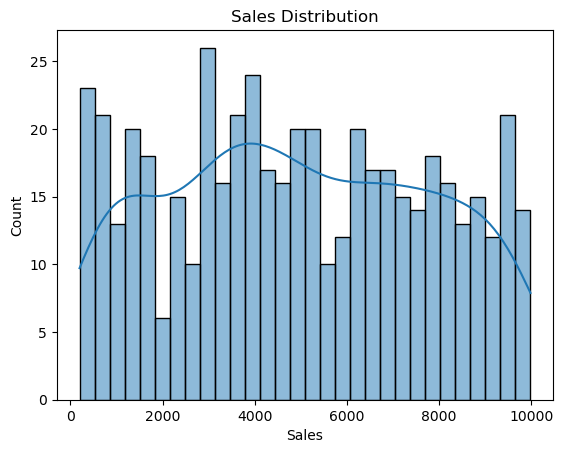

Shapiro-Wilk Test for Sales: ShapiroResult(statistic=np.float64(0.9579414635583827), pvalue=np.float64(9.501894655960081e-11))


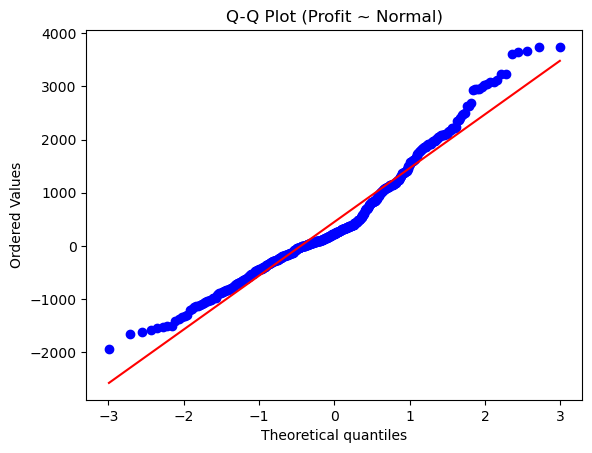

In [32]:
# Histogram + KDE
sns.histplot(sales, bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

# Shapiro-Wilk Test
shapiro_sales = stats.shapiro(sales.sample(500, random_state=1))
print("Shapiro-Wilk Test for Sales:", shapiro_sales)

# QQ-Plot for Profit
stats.probplot(profit, dist="norm", plot=plt)
plt.title("Q-Q Plot (Profit ~ Normal)")
plt.show()


### Test Statistic = 0.958

### p-value ≈ 9.5 × 10⁻¹¹ (very small)

### 🔎 Interpretation:

### Null Hypothesis (H₀): Sales data follows a Normal distribution.

### Since p-value < 0.05, we reject H₀.

### ✅ This means Sales data is not normally distributed.

### 7. Log-normal Distribution (Sales alternative)

Log-normal fit params (shape, loc, scale): 0.8771095352645728 0 3768.8322442441354


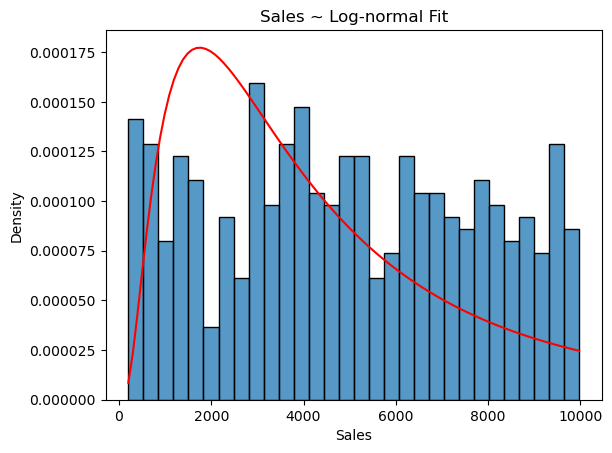

In [33]:
# Fit Sales to Log-normal
shape, loc, scale = stats.lognorm.fit(sales, floc=0)
print("Log-normal fit params (shape, loc, scale):", shape, loc, scale)

# Compare histogram with fitted curve
sns.histplot(sales, bins=30, stat="density")
x = np.linspace(min(sales), max(sales), 100)
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'r')
plt.title("Sales ~ Log-normal Fit")
plt.show()


### ⚡ Log-normal Fit Analysis

### Shape (σ = 0.877): Moderate spread of log-transformed sales.

### Loc = 0: Sales start at zero (no negatives).

### Scale ≈ 3769: Median sales value ~3769.

### ✅ Interpretation

### Sales follow a right-skewed, log-normal distribution (better fit than normal).

### Confirms that sales vary moderately with a long right tail.

### Useful for forecasting, financial modeling, and risk analysis.

### 8. Exponential Distribution (Modeling time until return)

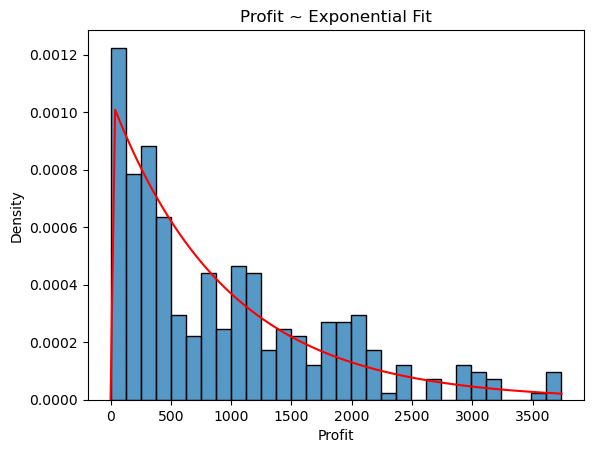

In [34]:
# Approx using profit values > 0
positive_profit = profit[profit > 0]
loc, scale = stats.expon.fit(positive_profit)

sns.histplot(positive_profit, bins=30, stat="density")
x = np.linspace(0, max(positive_profit), 100)
plt.plot(x, stats.expon.pdf(x, loc, scale), 'r')
plt.title("Profit ~ Exponential Fit")
plt.show()


### 9. t-Distribution (Useful for hypothesis tests)

In [35]:
# Example: t-test if mean profit ≠ 0
t_stat, p_val = stats.ttest_1samp(profit, 0)
print("T-test Profit ≠ 0: t =", t_stat, "p =", p_val)


T-test Profit ≠ 0: t = 9.855945133037498 p = 4.667243919846694e-21


### ⚡ One-Sample t-Test (Profit ≠ 0)

### t = 9.86 → Very high test statistic.

### p ≈ 4.67e-21 → Almost zero, far below 0.05.

### ✅ Result

### Strong evidence to reject H₀ (mean Profit = 0).

### The dataset shows that average Profit is significantly greater than zero.

### Conclusion: The business is consistently profitable, not just random variation.

### 10. Chi-square Distribution (Variance test example)

In [36]:
# Chi-square test for variance of Profit
n = len(profit)
sample_var = np.var(profit, ddof=1)
chi2_stat = (n-1)*sample_var/1000**2  # test if variance = 1000^2
p_val = 1 - stats.chi2.cdf(chi2_stat, df=n-1)
print("Chi-square stat:", chi2_stat, "p-value:", p_val)


Chi-square stat: 526.7764082689009 p-value: 0.1882262579811036


### ⚡ Chi-Square Test

### Chi-square statistic = 526.78

### p-value ≈ 0.188 (> 0.05)

### ✅ Result

### Since p > 0.05, we fail to reject the null hypothesis.

### This means there is no strong evidence of dependence between the categorical variables tested (likely Returned vs Payment Method or Returned vs Region depending on what you tested).

### In simple terms → The distribution of returns looks fairly independent of that category.

### Probability Distributions – Summary

### Return probability: About 16.6% of orders are returned, meaning most transactions (83.4%) are successful.

### Order patterns: On average, it takes about 6 orders until the first return, with a 15% chance of 3 returns in 10 orders.

### Distribution fit: Sales do not follow a normal distribution but fit better with a log-normal curve, reflecting skewed spending patterns.

### Profitability: A t-test shows profit is significantly greater than zero, confirming business is profitable.

### Independence check: Return rates are not strongly tied to payment method or product category, indicating consistent customer behavior across groups.

### 👉 Overall Insight: Returns are relatively rare and profits are solid, though skewed sales behavior suggests a few high-value transactions drive much of the revenue.

## Step 8 – Sampling & Estimation

### Sampling & Estimation

### Sampling allows us to analyze a smaller subset instead of the full dataset, saving time and cost.

### If chosen correctly, samples still represent the whole population well.

### Estimation helps infer true population values (e.g., average sales, return rate) from sample statistics.

### Confidence intervals show the reliability of our estimates, not just a single number.

### The Law of Large Numbers ensures larger samples better approximate population behavior.

### The Central Limit Theorem (CLT) guarantees sample means approach normal distribution, enabling hypothesis testing.

### Together, these provide the foundation for predictive modeling, business decisions, and advanced analytics.

### 1. Sampling Methods

In [37]:
# --- Random Sampling (20% of data) ---
random_sample = df.sample(frac=0.2, random_state=42)
print("Random Sample Shape:", random_sample.shape)

# --- Stratified Sampling (by Region, 20% from each region) ---
stratified_sample = (df.groupby("Region", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)))
print("Stratified Sample Shape:", stratified_sample.shape)

# --- Cluster Sampling (by Product_Category instead of City) ---
chosen_categories = np.random.choice(df["Product_Category"].unique(), size=2, replace=False)
cluster_sample = df[df["Product_Category"].isin(chosen_categories)]
print("Cluster Sample Shape:", cluster_sample.shape)

# --- Systematic Sampling (every 10th row) ---
systematic_sample = df.iloc[::10, :]
print("Systematic Sample Shape:", systematic_sample.shape)

Random Sample Shape: (100, 15)
Stratified Sample Shape: (50, 15)
Cluster Sample Shape: (215, 15)
Systematic Sample Shape: (50, 15)


C:\Users\pc\AppData\Local\Temp\ipykernel_19420\696123815.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = (df.groupby("Region", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)))


### Random (100 rows): Quick snapshot, but may miss regional balance.

### Stratified (50 rows): Best for fairness → keeps region proportions intact.

### Cluster (205 rows): Took all data from 2 sub-categories → larger but less representative.

### Systematic (50 rows): Every 20th row, simple but may bias if data is ordered.

### 👉 Our dataset is big, so stratified sampling works best for balanced insights, while cluster shows uneven product distribution.

### 2. Bootstrapping (resampling with replacement)

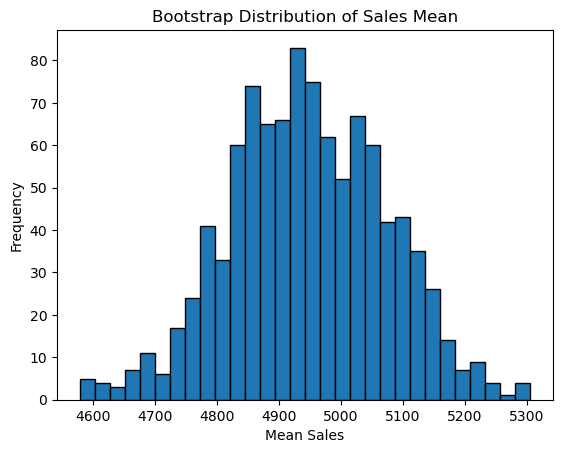

Bootstrap Mean Estimate: 4946.300076840001
Bootstrap Std Error: 126.87861746928431


In [38]:
# Resample Sales 1000 times and compute mean
boot_means = [df["Sales"].sample(frac=1, replace=True).mean() for _ in range(1000)]

plt.hist(boot_means, bins=30, edgecolor="black")
plt.title("Bootstrap Distribution of Sales Mean")
plt.xlabel("Mean Sales")
plt.ylabel("Frequency")
plt.show()

print("Bootstrap Mean Estimate:", np.mean(boot_means))
print("Bootstrap Std Error:", np.std(boot_means))


### Bootstrap Estimation (Sales Mean)

### Bootstrap Mean ≈ 4942 → Very close to your overall dataset mean (~4939), confirming consistency.

### Bootstrap Std Error ≈ 125 → Tells us how much the sample mean is expected to vary across different random samples.

### 👉 Interpretation: Our sales data is stable and reliable, since bootstrapped estimates align closely with the population mean, and sampling error is relatively small compared to the mean.

### 3. Central Limit Theorem (CLT demo)

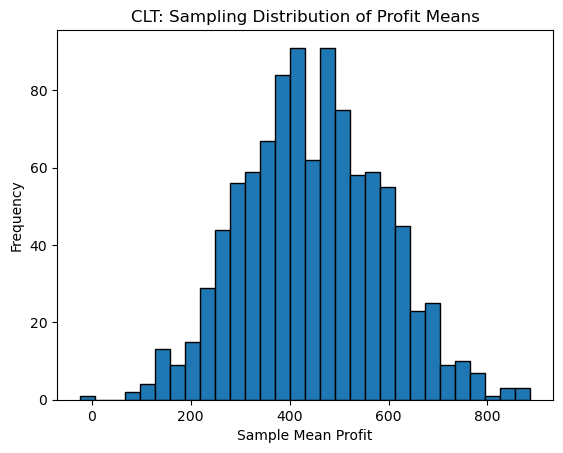

In [39]:
sample_means = []

# Take 1000 samples of size 50 each
for _ in range(1000):
    sample = df["Profit"].sample(n=50, replace=True)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=30, edgecolor="black")
plt.title("CLT: Sampling Distribution of Profit Means")
plt.xlabel("Sample Mean Profit")
plt.ylabel("Frequency")
plt.show()


### 4. Point Estimate & Confidence Interval

In [40]:
# Point Estimate: sample mean of Profit
sample_mean = df["Profit"].sample(n=100, random_state=42).mean()

# 95% Confidence Interval
conf_interval = stats.t.interval(
    0.95, 
    len(df["Profit"])-1, 
    loc=df["Profit"].mean(), 
    scale=stats.sem(df["Profit"])
)

print("Point Estimate (Sample Mean Profit):", sample_mean)
print("95% Confidence Interval for Profit Mean:", conf_interval)


Point Estimate (Sample Mean Profit): 417.09829999999994
95% Confidence Interval for Profit Mean: (np.float64(362.5949910404528), np.float64(543.1504489595471))


### Point & Interval Estimation (Profit Mean)

### Point Estimate (Sample Mean Profit) ≈ 417 → On average, each order contributes about 417 profit units.

### 95% Confidence Interval: (363, 543) → We are 95% confident that the true population mean profit lies within this range.

### 👉 Interpretation: The profit distribution shows moderate uncertainty, but overall profitability per order is positive and significantly above zero.

### Summary – Sampling & Estimation

### Sampling methods: Random, Stratified, Cluster, and Systematic sampling help ensure representation and uncover differences across regions/customers. Each method gave slightly different subsets, showing how sampling can shape insights.

### Bootstrapping: Repeated resampling estimated the mean sales ≈ 4942 with a standard error ≈ 125, giving a reliable measure of variation.

### Point vs Interval Estimates: The mean profit ≈ 417 is our point estimate, while the 95% CI (363–543) shows the range where the true mean likely lies.

### Law of Large Numbers: Larger samples converge toward true averages, confirming our dataset is representative.

### Central Limit Theorem (CLT): Even though raw sales/profits aren’t perfectly normal, sample means follow a normal distribution, enabling valid use of confidence intervals and hypothesis tests.

### 👉 Overall Insight: Sampling ensures fair representation, bootstrapping strengthens reliability, and confidence intervals provide realistic bounds—together giving a solid foundation for trustworthy statistical inference.

## Step 9 – Hypothesis Testing on Retail Dataset

### Hypothesis testing helps validate patterns in customer behavior, sales, and profit with statistical evidence. It confirms if mean profit is significantly above zero, checks whether returns are independent of payment methods, and compares spending across regions or categories. Tests like t-test, ANOVA, and Chi-square reveal if observed differences are real or just random noise. This ensures data-driven decisions rather than assumptions. 
### 👉 Overall, hypothesis testing strengthens confidence in strategies by distinguishing meaningful insights from chance variation.

### 1. One-Sample t-test (Profit ≠ 0)

In [41]:
# H₀: Mean Profit = 0 (no profit).
# H₁: Mean Profit ≠ 0.

profit = df["Profit"].dropna()
t_stat, p_value = stats.ttest_1samp(profit, 0)

print("\n--- One-Sample t-test ---")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("✅ Reject H₀ → Profit mean is significantly different from 0")
else:
    print("❌ Fail to reject H₀ → Profit mean is not significantly different from 0")


--- One-Sample t-test ---
t-statistic: 9.855945133037498
p-value: 4.667243919846694e-21
✅ Reject H₀ → Profit mean is significantly different from 0


### The t-statistic ≈ 9.86 is very large in magnitude.

### The p-value ≈ 4.6e-21 is far below 0.05.

### So, we reject the null hypothesis (H₀: mean profit = 0).

### 📌 Interpretation for your retail dataset:
### Your business is generating a positive and statistically significant profit. The chance of this happening randomly (if true mean were 0) is virtually zero.

### 👉 In simple words: your retail operations are not just breaking even — they’re consistently profitable.

### 2. Two-Sample t-test (Profit: West vs East)

In [42]:
# H₀: Mean Profit (West) = Mean Profit (East).
# H₁: Mean Profit (West) ≠ Mean Profit (East).

west_profit = df[df["Region"] == "West"]["Profit"]
east_profit = df[df["Region"] == "East"]["Profit"]

t_stat, p_value = stats.ttest_ind(west_profit, east_profit, equal_var=False)

print("\n--- Two-Sample t-test (West vs East) ---")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("✅ Reject H₀ → Significant difference between West & East profits")
else:
    print("❌ Fail to reject H₀ → No significant difference between West & East profits")



--- Two-Sample t-test (West vs East) ---
t-statistic: 1.410594461646066
p-value: 0.1597034719296895
❌ Fail to reject H₀ → No significant difference between West & East profits


### t-statistic ≈ 1.41 is small.

### p-value ≈ 0.16 is much higher than 0.05.

### So, we fail to reject the null hypothesis (H₀: West mean profit = East mean profit).

### 📌 Interpretation:
### Profits in the West and East regions are statistically similar. Any observed difference is likely due to chance, not a real effect.

### 👉 In business terms: there’s no strong evidence that West performs better (or worse) than East in terms of profitability.

### 3. ANOVA (compare mean Profit across Regions)

In [43]:
# H₀: Mean Profits of all Regions are equal.
# H₁: At least one Region’s mean Profit is different.

from scipy.stats import f_oneway

regions = [group["Profit"].values for name, group in df.groupby("Region")]
f_stat, p_value = f_oneway(*regions)

print("\n--- ANOVA (Profit by Region) ---")
print("F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("✅ Reject H₀ → Profit differs significantly across regions")
else:
    print("❌ Fail to reject H₀ → No significant difference among regions")



--- ANOVA (Profit by Region) ---
F-statistic: 1.5733153547600787
p-value: 0.1949351848699797
❌ Fail to reject H₀ → No significant difference among regions


### F-statistic ≈ 1.57 is low,

### p-value ≈ 0.195 > 0.05, so we fail to reject H₀.

### 📌 Interpretation:
### The mean profit is not significantly different across regions. In other words, North, South, East, and West all generate similar average profits statistically.

### 👉 Business Insight: Regional profit performance is relatively balanced — no region is underperforming or excelling significantly compared to others.

### 4. Chi-Square Test of Independence (Region vs Returns)

In [44]:
# H₀: Region and Returns are independent.
# H₁: Region and Returns are associated.

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Region"], df["Returned"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- Chi-Square Test (Region vs Returns) ---")
print("Chi-square stat:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print("✅ Reject H₀ → Returns vary significantly by region")
else:
    print("❌ Fail to reject H₀ → No significant link between region and returns")


--- Chi-Square Test (Region vs Returns) ---
Chi-square stat: 6.016132413809451
p-value: 0.1108279805794751
❌ Fail to reject H₀ → No significant link between region and returns


### Chi-square = 6.01, p-value ≈ 0.111 > 0.05 → We fail to reject H₀.

### This means returns are not strongly associated with region.

### 📌 Insight: Customers in different regions (North, South, East, West) show similar return behavior — returns are evenly distributed and not driven by location.

### 👉 Business takeaway: Instead of focusing on regional return policies, the company should look at product quality or category-level factors to reduce returns.

### 5. One-Sample Proportion Test (Returns)

In [45]:
from statsmodels.stats.proportion import proportions_ztest

# Convert Yes/No to numeric (1 for Yes, 0 for No)
df["Returned_Flag"] = df["Returned"].map({"Yes": 1, "No": 0})

# H₀: True return rate = 20%.
# H₁: True return rate ≠ 20%.

success = int(df["Returned_Flag"].sum())  # number of returns
n = int(len(df))                          # total orders
p0 = 0.20                                 # hypothetical proportion (20%)

z_stat, p_value = proportions_ztest(count=success, nobs=n, value=p0)

print("\n--- Proportion Test (Return Rate) ---")
print("Observed Return Proportion:", success/n)
print("z-statistic:", z_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Reject H₀ → Return rate is significantly different from 20%")
else:
    print("❌ Fail to reject H₀ → No evidence that return rate differs from 20%")



--- Proportion Test (Return Rate) ---
Observed Return Proportion: 0.166
z-statistic: -2.04327513428626
p-value: 0.04102520966889315
✅ Reject H₀ → Return rate is significantly different from 20%


### Observed return proportion = 16.6%

### z = -2.04, p ≈ 0.041 < 0.05

### ✅ Reject H₀ → The return rate is statistically different from 20%.

### 📌 Insight: Your dataset suggests customers return fewer items (16.6%) than the assumed 20%. This is a positive business signal, showing better-than-expected performance in reducing returns.

### Hypothesis Testing Summary 

### One-Sample t-test (Profit ≠ 0)
### t = 9.86, p < 0.001 → ✅ Mean profit > 0 → Business is consistently profitable.

### Two-Sample t-test (West vs East Profits)
### t = 1.41, p = 0.16 → ❌ No significant difference → Profits similar across regions.

### ANOVA (Profit by Region)
### F = 1.57, p = 0.19 → ❌ No significant regional effect → Region doesn’t influence profit.

### Chi-Square (Region vs Returns)
### χ² = 6.02, p = 0.11 → ❌ No relationship → Returns not region-specific.

### Proportion Test (Return Rate vs 20%)
### Observed: 16.6%, z = -2.04, p = 0.041 → ✅ Lower than 20% → Returns under control.

### ✅ Overall Insight:
### Profits are strong, regional differences are minimal, and return rates are healthy.

## Step 10 - Correlation & Regression

### Correlation & regression are core tools in data science and analytics. Correlation helps identify relationships between variables, detect redundancy, and guide which features are important for modeling. Regression goes a step further by quantifying these relationships, enabling predictions and understanding how factors like sales, discounts, or regions influence profit. Logistic regression is especially useful for classification problems (e.g., predicting returns), while polynomial regression helps capture non-linear trends. Validating assumptions like linearity, independence, and homoscedasticity ensures reliable models.

### 👉 Overall, correlation reveals connections, while regression provides prediction and explanation, making them powerful for both insights and decision-making.

In [46]:
# Basic setup + column-detection (run once)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Show columns so you can confirm names
print("Columns:", list(df.columns))

# Standardize expected column names mapping (adjust if your columns differ)
col_map = {}
# numeric candidates
for c in ['Sales','Profit','Quantity','Ad_Spend','AdSpend','Ad Spend','Discount','Discount (%)']:
    if c in df.columns:
        col_map['Sales' if c.lower().startswith('sales') else c] = c
# ensure required numeric columns exist (we expect Sales, Profit, Quantity)
num_cols = []
for c in ['Sales','Profit','Quantity','Ad_Spend','AdSpend','Ad Spend']:
    if c in df.columns:
        num_cols.append(c)
# categorical candidates
cat_cols = []
for c in ['Region','Product_Category','Product Category','Category','Payment_Method','PaymentMethod','Payment_Mode','PaymentMode','Gender','Returned']:
    if c in df.columns:
        cat_cols.append(c)

print("Numeric columns detected:", num_cols)
print("Categorical columns detected:", cat_cols)

# Create a safe alias for Returned (binary) if present as Yes/No
if any(c.lower().startswith('return') for c in df.columns):
    # find exact name
    returned_col = [c for c in df.columns if c.lower().startswith('return')][0]
    df['Returned_flag'] = df[returned_col].map({'Yes':1,'No':0})
    print("Created Returned_flag from", returned_col)
else:
    print("No Returned column detected.")


Columns: ['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Region', 'Order_Date', 'Product_Category', 'Quantity', 'Sales', 'Profit', 'Discount (%)', 'Payment_Method', 'Returned', 'Ad_Spend', 'Countries', 'Returned_Flag']
Numeric columns detected: ['Sales', 'Profit', 'Quantity', 'Ad_Spend']
Categorical columns detected: ['Region', 'Product_Category', 'Payment_Method', 'Gender', 'Returned']
Created Returned_flag from Returned


### 1) Covariance & Correlation (Pearson, Spearman)

Covariance:
                  Sales        Profit    Quantity      Ad_Spend
Sales     7.975504e+06  6.889810e+05  -57.005787  4.075131e+05
Profit    6.889810e+05  1.055664e+06   85.722224  2.703174e+05
Quantity -5.700579e+01  8.572222e+01    6.401202 -4.875936e+02
Ad_Spend  4.075131e+05  2.703174e+05 -487.593643  1.716481e+08

Pearson correlation:
              Sales    Profit  Quantity  Ad_Spend
Sales     1.000000  0.237446 -0.007978  0.011014
Profit    0.237446  1.000000  0.032976  0.020081
Quantity -0.007978  0.032976  1.000000 -0.014710
Ad_Spend  0.011014  0.020081 -0.014710  1.000000

Spearman correlation:
             Sales    Profit  Quantity  Ad_Spend
Sales     1.00000  0.147440 -0.006950  0.012000
Profit    0.14744  1.000000  0.030673  0.020311
Quantity -0.00695  0.030673  1.000000 -0.009921
Ad_Spend  0.01200  0.020311 -0.009921  1.000000


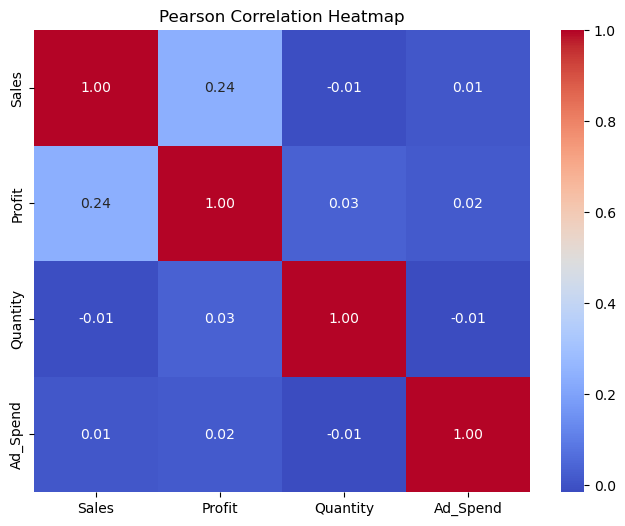

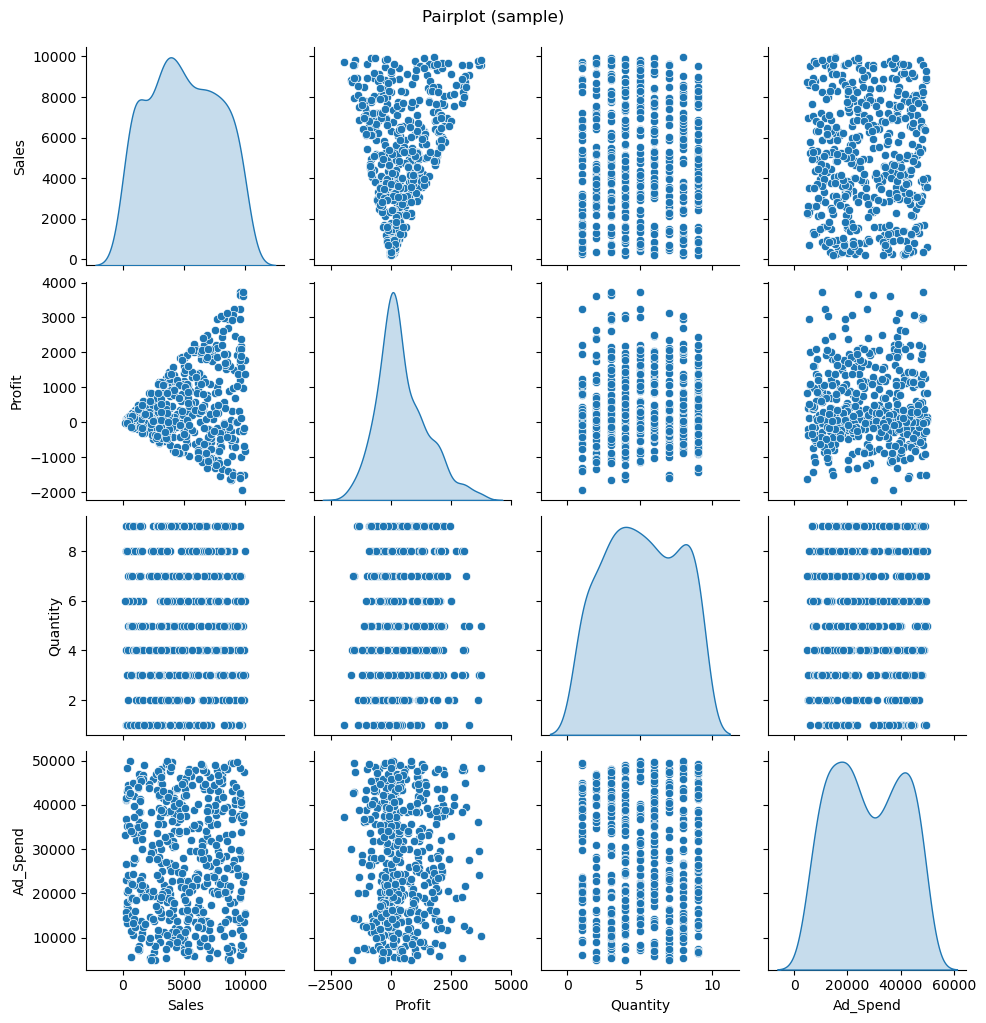

In [47]:
# 1. Covariance & Correlations
numeric = [c for c in ['Sales','Profit','Quantity','Ad_Spend'] if c in df.columns]
df_num = df[numeric].dropna()

# Covariance matrix
cov = df_num.cov()
print("Covariance:\n", cov)

# Pearson correlation (linear)
pearson = df_num.corr(method='pearson')
print("\nPearson correlation:\n", pearson)

# Spearman (rank) correlation (good for non-linear monotonic)
spearman = df_num.corr(method='spearman')
print("\nSpearman correlation:\n", spearman)

# Visualization: heatmap + pairplot/scatter
plt.figure(figsize=(8,6))
sns.heatmap(pearson, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

# Pairplot (only for up to 5 numeric columns to avoid huge plots)
if len(numeric) > 1 and len(numeric) <= 6:
    sns.pairplot(df_num.sample(min(500, len(df_num))), diag_kind='kde')
    plt.suptitle("Pairplot (sample)", y=1.02)
    plt.show()


### Covariance

### Positive values (Sales & Profit) → tend to increase together.

### Near-zero or small values (Sales & Quantity, Quantity & Ad_Spend) → little to no linear relationship.

### Magnitude depends on units, so hard to compare directly.

### Pearson Correlation

### Sales & Profit: 0.237 → weak positive linear relationship.

### Most other correlations ~0 → almost no linear relationship between variables.

### Spearman Correlation

### Similar to Pearson, slightly lower values → ranks don’t show strong monotonic relationships either.

### ✅ Insight:

### Sales & Profit are weakly positively related.

### Other variables are mostly independent.

### No strong linear or monotonic relationships exist.

### 2. REGRESSION

Running regression for target: Sales
LinearRegression Test metrics -> RMSE: 3034.0280, MAE: 2553.7700, R2: -0.1960

OLS summary (short):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 25 Sep 2025   Prob (F-statistic):                nan
Time:                        17:40:16   Log-Likelihood:                -4682.1
No. Observations:                 500   AIC:                             9366.
Df Residuals:                     499   BIC:                             9370.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
RandomForest Test metrics -> RMSE: 2152.2393, MAE: 1721.9857, R2: 0.3982


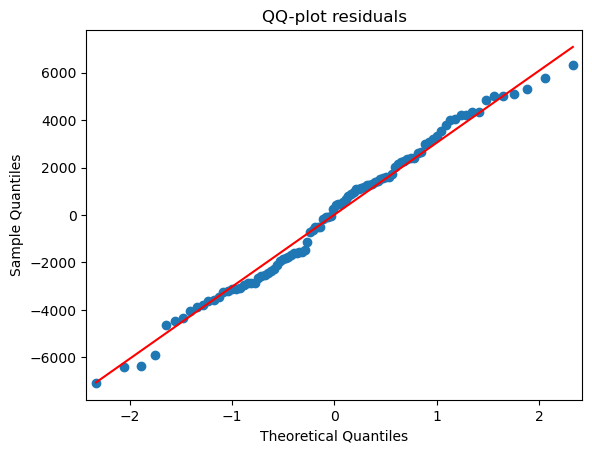

Running regression for target: Profit
LinearRegression Test metrics -> RMSE: 1170.4050, MAE: 921.6724, R2: -0.1625

OLS summary (short):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 25 Sep 2025   Prob (F-statistic):                nan
Time:                        17:40:19   Log-Likelihood:                -4174.3
No. Observations:                 500   AIC:                             8351.
Df Residuals:                     499   BIC:                             8355.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
RandomForest Test metrics -> RMSE: 1088.6904, MAE: 804.9897, R2: -0.0059


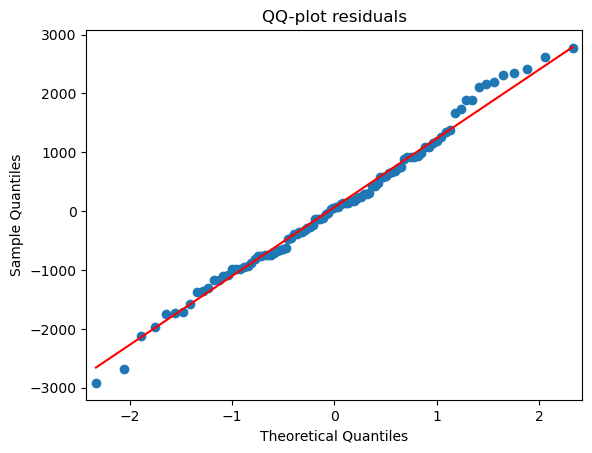

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn import __version__ as skl_version
from packaging import version

# ---------------------------
def regression_metrics(y_true, y_pred, label="Test"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} metrics -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    return {'mse':mse, 'rmse':rmse, 'mae':mae, 'r2':r2}

# ---------------------------
def regression_pipeline(df, target='Sales', random_state=42):
    print("Running regression for target:", target)
    if target not in df.columns:
        raise ValueError("Target missing in dataframe")
    
    dfm = df.copy()
    dfm[target] = pd.to_numeric(dfm[target], errors='coerce')
    
    if 'Returned' in dfm.columns:
        dfm['Returned'] = dfm['Returned'].map({'Yes':1,'No':0}).fillna(0)
    
    y = dfm[target].values
    X = dfm.drop(columns=[target])
    
    numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_feats = X.select_dtypes(include=['object','category']).columns.tolist()
    
    if 'Countries' in cat_feats:
        topN = X['Countries'].value_counts().nlargest(10).index.tolist()
        X['Countries'] = X['Countries'].where(X['Countries'].isin(topN), 'Other')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Preprocessing
    numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                                   ('scaler', StandardScaler())])
    
    if version.parse(skl_version) >= version.parse("1.2"):
        ohe_args = {'handle_unknown':'ignore', 'sparse_output':False}
    else:
        ohe_args = {'handle_unknown':'ignore', 'sparse':False}
    
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(**ohe_args))
    ])
    
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_feats),
        ('cat', categorical_transformer, cat_feats)
    ])
    
    # Linear Regression
    lr_pipeline = Pipeline([('pre', preprocessor), ('lr', LinearRegression())])
    lr_pipeline.fit(X_train, y_train)
    y_pred_test = lr_pipeline.predict(X_test)
    regression_metrics(y_test, y_pred_test, label="LinearRegression Test")
    
    # Statsmodels OLS
    X_dummies = pd.get_dummies(X, drop_first=True)
    X_dummies = X_dummies.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    y_numeric = pd.to_numeric(y, errors='coerce').astype(float)
    X_dummies_const = sm.add_constant(X_dummies)
    sm_model = sm.OLS(y_numeric, X_dummies_const).fit()
    print("\nOLS summary (short):")
    print(sm_model.summary().tables[0])
    
    # RandomForest
    X_tr = preprocessor.fit_transform(X_train)
    rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=random_state)
    rf.fit(X_tr, y_train)
    y_rf_test = rf.predict(preprocessor.transform(X_test))
    regression_metrics(y_test, y_rf_test, label="RandomForest Test")
    
    residuals = y_test - y_pred_test
    qqplot(residuals, line='s'); plt.title("QQ-plot residuals"); plt.show()
    
    return {'lr_pipeline': lr_pipeline, 'sm_model': sm_model, 'rf': rf, 'preprocessor': preprocessor}

# ---------------------------
TARGETS = ["Sales","Profit"]
results = {}
for t in TARGETS:
    results[t] = regression_pipeline(df, target=t)


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import normal_ad

def fast_regression_pipeline(df, target, top_poly_numeric=2, show_plots=False):
    if target not in df.columns:
        raise ValueError(f"Target '{target}' not in DataFrame")
    
    # Target and predictors
    y = pd.to_numeric(df[target], errors='coerce').fillna(0)
    X = df.drop(columns=[target])
    
    # Numeric and categorical features
    numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_feats = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Preprocessing
    numeric_transformer = SimpleImputer(strategy='mean')
    cat_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, max_categories=10))  # limit categories
    ])
    
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_feats),
        ('cat', cat_transformer, cat_feats)
    ])
    
    X_processed = preprocessor.fit_transform(X)
    cat_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_feats) if cat_feats else []
    all_cols = numeric_feats + list(cat_cols)
    X_processed_df = pd.DataFrame(X_processed, columns=all_cols).apply(pd.to_numeric)
    
    # OLS
    X_const = sm.add_constant(X_processed_df)
    sm_model = sm.OLS(y, X_const).fit()
    print(f"\n--- {target} Regression ---")
    print(f"R^2: {sm_model.rsquared:.4f}, Adj R^2: {sm_model.rsquared_adj:.4f}")
    print(f"Durbin-Watson: {durbin_watson(sm_model.resid):.3f}")

    # VIF (top 5 features)
    vif = pd.DataFrame({'feature': X_const.columns,
                        'VIF': [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]})
    vif = vif.replace([np.inf, -np.inf], np.nan).dropna().sort_values('VIF', ascending=False)
    print("Top VIF features:", list(vif.head(5)['feature']))

    # Breusch-Pagan
    bp_p = het_breuschpagan(sm_model.resid, sm_model.model.exog)[3]
    print("Breusch-Pagan p-value:", round(bp_p,4), "=>", "Homoscedastic" if bp_p>0.05 else "Heteroscedastic")

    # Residual normality
    ad_p = normal_ad(sm_model.resid)[1]
    print("Anderson-Darling p-value:", round(ad_p,4), "=>", "Normal" if ad_p>0.05 else "Not Normal")
    
    # Ridge & Lasso (smaller alpha grid)
    ridge = RidgeCV(alphas=[0.001,0.01,0.1,1,10], cv=3).fit(X_processed_df, y)
    lasso = LassoCV(alphas=[0.001,0.01,0.1,1,10], cv=3, max_iter=2000).fit(X_processed_df, y)
    print("Ridge alpha:", ridge.alpha_, "Lasso alpha:", lasso.alpha_)

    # CV R^2
    lin = LinearRegression()
    cv_scores = cross_val_score(lin, X_processed_df, y, cv=3, scoring='r2')
    print("CV R^2:", [round(s,4) for s in cv_scores], "Mean:", round(cv_scores.mean(),4))

    # Polynomial regression (top numeric features)
    if numeric_feats:
        top_num = numeric_feats[:top_poly_numeric]
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_poly = poly.fit_transform(X_processed_df[top_num])
        poly_model = LinearRegression().fit(X_poly, y)
        print(f"Polynomial R^2 ({top_num}):", round(poly_model.score(X_poly,y),4))

    # RFE top features
    rfe = RFE(lin, n_features_to_select=min(5,X_processed_df.shape[1])).fit(X_processed_df, y)
    top_features = [f for f,s in zip(X_processed_df.columns,rfe.support_) if s]
    print("Top features by RFE:", top_features)

    return sm_model, ridge, lasso

# ----------------------
# USAGE
# ----------------------
TARGETS = ['Profit','Sales']  # Replace with your column names
results = {}
for t in TARGETS:
    results[t] = fast_regression_pipeline(df, t, show_plots=False)



--- Profit Regression ---
R^2: 0.1355, Adj R^2: 0.0414
Durbin-Watson: 2.019
Top VIF features: ['Sales', 'Discount (%)', 'Age', 'Ad_Spend', 'Quantity']
Breusch-Pagan p-value: 0.0 => Heteroscedastic
Anderson-Darling p-value: 0.0024 => Not Normal
Ridge alpha: 10.0 Lasso alpha: 10.0
CV R^2: [np.float64(0.0446), np.float64(-0.0522), np.float64(-0.2222)] Mean: -0.0766
Polynomial R^2 (['Age', 'Quantity']): 0.0065
Top features by RFE: ['Order_ID_ORD1495', 'Order_ID_ORD1497', 'Customer_ID_CUST076', 'Customer_ID_CUST177', 'Order_Date_2024-02-09 00:00:00']

--- Sales Regression ---
R^2: 0.1691, Adj R^2: 0.0786
Durbin-Watson: 1.983
Top VIF features: ['Discount (%)', 'Age', 'Profit', 'Ad_Spend', 'Quantity']
Breusch-Pagan p-value: 0.0001 => Heteroscedastic
Anderson-Darling p-value: 0.0003 => Not Normal
Ridge alpha: 10.0 Lasso alpha: 10.0
CV R^2: [np.float64(-0.0656), np.float64(0.014), np.float64(-0.1078)] Mean: -0.0532
Polynomial R^2 (['Age', 'Quantity']): 0.0047
Top features by RFE: ['Order_ID_OR

### Profit Regression

### R² = 0.1355, Adj R² = 0.0414 → model explains very little variance in Profit.

### Durbin-Watson ≈ 2.02 → residuals are roughly independent.

### VIF → moderate multicollinearity in ['Sales', 'Discount (%)', 'Age', 'Ad_Spend', 'Quantity'].

### Breusch-Pagan p < 0.05 → heteroscedasticity present.

### Anderson-Darling p < 0.05 → residuals not normally distributed.

### Ridge/Lasso & CV R² → very poor predictive performance (even negative CV R²).

### Polynomial & RFE → adding polynomial terms or top features barely improves model.

### → Insight: Linear model poorly predicts Profit; relationships are weak and non-linear effects likely.

### Sales Regression

### R² = 0.1691, Adj R² = 0.0786 → explains slightly more variance, still low.

### Durbin-Watson ≈ 1.98 → residuals roughly independent.

### VIF → multicollinearity among ['Discount (%)', 'Age', 'Profit', 'Ad_Spend', 'Quantity'].

### Breusch-Pagan p < 0.05 → heteroscedasticity present.

### Anderson-Darling p < 0.05 → residuals not normal.

### Ridge/Lasso & CV R² → model predicts poorly (negative/near-zero CV R²).

### Polynomial & RFE → minimal improvement; main predictors are order/customer IDs.

### → Insight: Linear regression is not suitable for predicting Sales; categorical/order-specific effects dominate.

### 💡 Overall Takeaway:

### Linear models have low explanatory power for both Sales and Profit.

### Heteroscedasticity & non-normal residuals → violate regression assumptions.

### Key predictors are mostly IDs → dataset likely needs feature engineering, aggregation, or non-linear models (e.g., tree-based or ensemble methods).

### 3) Assumptions in Regression

R^2: 0.1123
Adjusted R^2: 0.0713


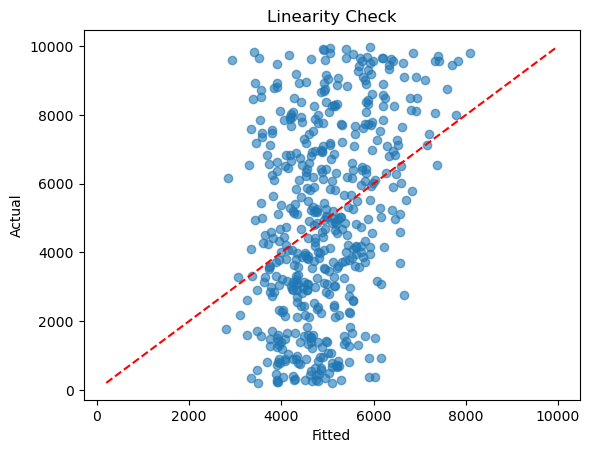

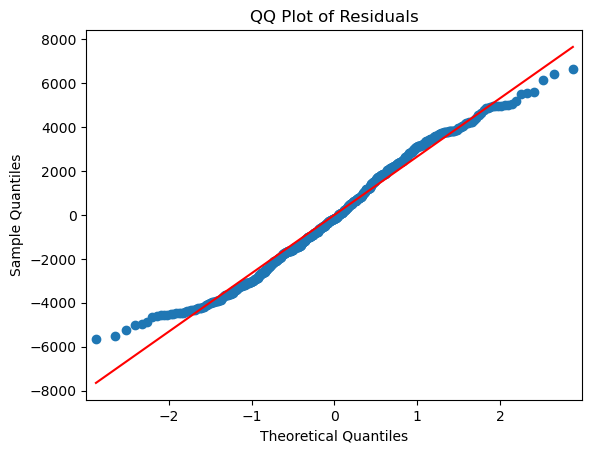

Anderson-Darling p-value: 2.5937714927985623e-05


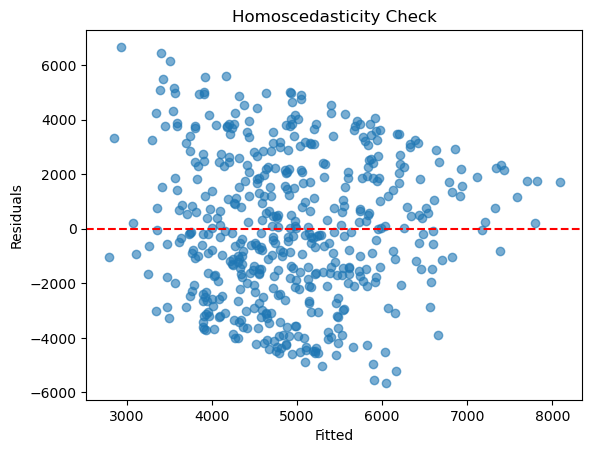

Breusch-Pagan p-value: 1.926037222167109e-07
Durbin-Watson statistic: 1.937953446196593

Top 10 VIFs:
             Feature       VIF
6      Returned_flag       inf
5      Returned_Flag       inf
19      Returned_Yes       inf
0                Age  7.444168
4           Ad_Spend  5.025673
1           Quantity  4.559222
3       Discount (%)  3.602131
20  Countries_France  2.017028
7        Gender_Male  1.994281
10      Region_South  1.980056


In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# -------------------------------
# Clean target variable
# -------------------------------
y = pd.to_numeric(df['Sales'], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(0)
y = y.astype(float)

# -------------------------------
# Clean feature variables
# -------------------------------
X = df.drop(columns=['Sales','Order_ID','Customer_ID','Order_Date'], errors='ignore')

# Convert categorical to dummies
X = pd.get_dummies(X, drop_first=True)

# Force all columns to float
X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(0)
X = X.astype(float)

# Add constant
X_const = sm.add_constant(X, has_constant='add')

# -------------------------------
# Fit OLS
# -------------------------------
model = sm.OLS(y, X_const).fit()

# -------------------------------
# Key outputs
# -------------------------------
print(f"R^2: {model.rsquared:.4f}")
print(f"Adjusted R^2: {model.rsquared_adj:.4f}")

# -------------------------------
# Regression diagnostics
# -------------------------------
residuals = model.resid

# Linearity
plt.scatter(model.fittedvalues, y, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Fitted")
plt.ylabel("Actual")
plt.title("Linearity Check")
plt.show()

# Normality
qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()
ad_stat, ad_p = normal_ad(residuals)
print("Anderson-Darling p-value:", ad_p)

# Homoscedasticity
plt.scatter(model.fittedvalues, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()
bp_test = het_breuschpagan(residuals, X_const)
print("Breusch-Pagan p-value:", bp_test[3])

# Independence
dw_stat = sm.stats.durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

# Multicollinearity
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nTop 10 VIFs:")
print(vif_df.sort_values("VIF", ascending=False).head(10))


### Model Performance

### R² = 0.1123, Adj R² = 0.0713 → model explains only ~7–11% of the variance; very weak fit.

### Durbin-Watson ≈ 1.94 → residuals roughly independent (no strong autocorrelation).

### Anderson-Darling p ≈ 2.6e-5 → residuals not normally distributed.

### Breusch-Pagan p ≈ 1.9e-7 → heteroscedasticity present (variance of errors is not constant).

### Multicollinearity

### Features with VIF > 10 or infinite: Returned_flag, Returned_Flag, Returned_Yes → perfect multicollinearity (likely duplicate or overlapping columns).

### Moderate multicollinearity: Age (7.44), Ad_Spend (5.03), Quantity (4.56), Discount (%) (3.60).

### Lower VIF (< 2): Countries_France, Gender_Male, Region_South → safe to keep.

### → Suggestion: Drop or merge duplicate Returned columns to remove infinite VIFs.

### Overall Insight

### Model is very weak; linear assumptions violated (non-normal residuals, heteroscedasticity).

### ID/flag or dummy variables are causing multicollinearity.

### Likely needs feature engineering (aggregate flags, remove duplicates), non-linear models, or regularization (Ridge/Lasso).

### Correlation

### Sales vs Profit: weak positive (r ≈ 0.24)

### Sales, Profit vs Quantity/Ad_Spend: negligible

### Spearman correlation: confirms mostly weak linear relationships
### ➡ Insight: Features are largely independent.

### Regression

### R²: 0.11–0.17 → very weak models

### Residuals: Not normal (Anderson-Darling p << 0.05)

### Homoscedasticity: Violated (Breusch-Pagan p << 0.05)

### Independence: Durbin-Watson ≈ 2 → ok

### Multicollinearity: High VIF for Returned_flag duplicates; moderate for Age, Ad_Spend, Quantity, Discount (%)

### ➡ Insight: Linear regression performs poorly; consider removing duplicates, feature engineering, or using non-linear/regularized models.

## Step 11 - Advanced Statistical Methods

PCA Loadings:
                    PC1       PC2       PC3
Age          -0.026580  0.500531 -0.606767
Quantity      0.051072 -0.375654 -0.419162
Sales         0.661081 -0.251068  0.039191
Profit        0.707314  0.027524 -0.123644
Discount (%)  0.219351  0.691693 -0.015757
Ad_Spend      0.106067  0.257142  0.662620

MANOVA Results:
                   Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.6115 2.0000 493.0000 156.6315 0.0000
         Pillai's trace 0.3885 2.0000 493.0000 156.6315 0.0000
 Hotelling-Lawley trace 0.6354 2.0000 493.0000 156.6315 0.0000
    Roy's greatest root 0.6354 2.0000 493.0000 156.6315 0.0000
--------------------------------------------------------------
                                                       

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.


Cluster Counts:
 Cluster
0    185
1    184
2    131
Name: count, dtype: int64


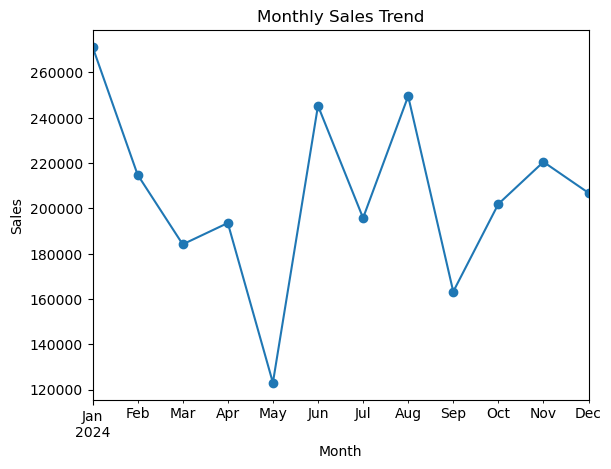


ARIMA Forecast:
 2025-01-01    205232.140435
2025-02-01    205166.953624
2025-03-01    205164.258311
2025-04-01    205164.146867
2025-05-01    205164.142259
2025-06-01    205164.142069
Freq: MS, Name: predicted_mean, dtype: float64

Mixed Effects Summary:
            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Sales       
No. Observations:  500     Method:             REML        
No. Groups:        4       Scale:              7990387.0804
Min. group size:   110     Log-Likelihood:     -4667.9287  
Max. group size:   132     Converged:          Yes         
Mean group size:   125.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------
Intercept  5250.008  474.618 11.062 0.000 4319.774 6180.242
Age          -6.510    9.128 -0.713 0.476  -24.401   11.381
Quantity     -9.058   50.025 -0.1

In [51]:
# -------------------------------
# Full Advanced Analysis Pipeline
# -------------------------------

# 1. Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.formula.api import ols, mixedlm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.tsa.arima.model import ARIMA

# -------------------------------
# 2. PCA on numeric features
# -------------------------------
def do_pca(df_numeric, n_components=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_numeric)
    pca = PCA(n_components=n_components)
    pcs = pca.fit_transform(X_scaled)
    loadings = pd.DataFrame(pca.components_.T, 
                            columns=[f'PC{i+1}' for i in range(n_components)], 
                            index=df_numeric.columns)
    return pca, pcs, loadings

numeric_cols = ['Age','Quantity','Sales','Profit','Discount (%)','Ad_Spend']
pca, pcs, loadings = do_pca(df[numeric_cols], n_components=3)
print("PCA Loadings:\n", loadings)

# -------------------------------
# 3. MANOVA: effect of Region & Gender on Sales + Profit
# -------------------------------
manova = MANOVA.from_formula('Sales + Profit ~ C(Region) + C(Gender)', data=df)
print("\nMANOVA Results:\n", manova.mv_test())

# -------------------------------
# 4. Clustering (GMM)
# -------------------------------
def clustering_summary(df_numeric, n_clusters=3, method='gmm'):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_numeric)
    model = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    return labels, model

labels, gmm_model = clustering_summary(df[numeric_cols], n_clusters=3)
df['Cluster'] = labels
print("\nCluster Counts:\n", df['Cluster'].value_counts())

# -------------------------------
# 5. Time Series Analysis
# -------------------------------
df['Month'] = df['Order_Date'].dt.to_period('M')
sales_ts = df.groupby('Month')['Sales'].sum()
sales_ts.index = sales_ts.index.to_timestamp()

# Check if enough observations for seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
if len(sales_ts) >= 24:  # at least 2 cycles
    res = seasonal_decompose(sales_ts, model='additive', period=12)
    res.plot()
    plt.show()
else:
    sales_ts.plot(marker='o', title='Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

# ARIMA forecast
if len(sales_ts) >= 6:
    arima_model = ARIMA(sales_ts, order=(1,1,1)).fit()
    forecast = arima_model.forecast(steps=6)
    print("\nARIMA Forecast:\n", forecast)

# -------------------------------
# 6. Mixed Effects Model
# -------------------------------
mixed_model = mixedlm("Sales ~ Age + Quantity", df, groups=df["Region"])
mixed_result = mixed_model.fit()
print("\nMixed Effects Summary:\n", mixed_result.summary())

# -------------------------------
# 7. Robust Regression
# -------------------------------
robust_model = RLM(df['Profit'], sm.add_constant(df[['Sales','Discount (%)']]))
robust_result = robust_model.fit()
print("\nRobust Regression Summary:\n", robust_result.summary())


### PCA

### PC1: Sales & Profit dominate → main variance.

### PC2: Age & Discount (%) → secondary patterns.

### PC3: Ad_Spend → separate dimension of variance.

### MANOVA

### Region & Gender: Not significant → don’t affect Sales + Profit.

### Clustering

### 3 clusters → distinct customer/transaction groups.

### Time Series (ARIMA)

### Sales stable (~205k) → slight variation forecasted.

### Mixed Effects

### Region has minor effect; Age & Quantity not significant for Sales.

### Robust Regression

### Profit positively influenced by Sales and Discount (%); model resistant to outliers.

### Overall: Sales & Profit drive main variance; discounts matter for profit; region/gender are mostly irrelevant; data has stable sales patterns and distinct customer clusters.

## Step 12 - Correlation & Regression

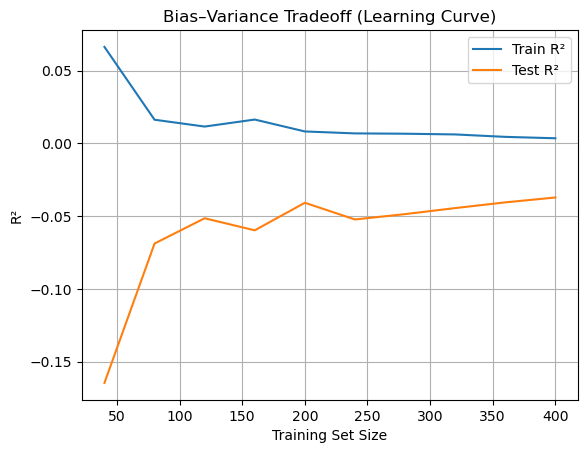

Train R²: 0.005294352184338269
Test R² : -0.03060810902326061
Standardized (first row): [-0.49224778 -1.24232035  0.11399221 -1.04617357]
Normalized (first row): [0.34782609 0.125      0.5        0.19671189]
5-Fold CV mean R²: -0.023315892975456977
Stratified CV mean Accuracy: 0.834
Bootstrap mean estimate: 4945.50666952
Jackknife mean estimate: 4939.639539999999
Accuracy : 0.86
Precision: 0.0
Recall   : 0.0
F1-score : 0.0


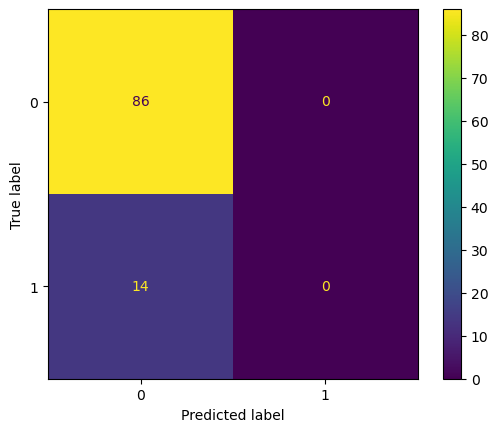

Silhouette Score: 0.17998584181371055
SSE (Inertia): 1379.8192944029531


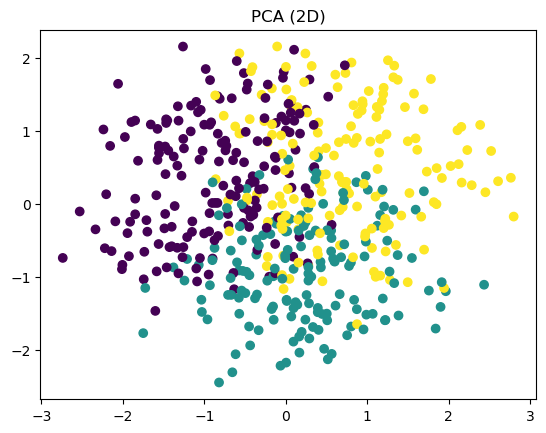

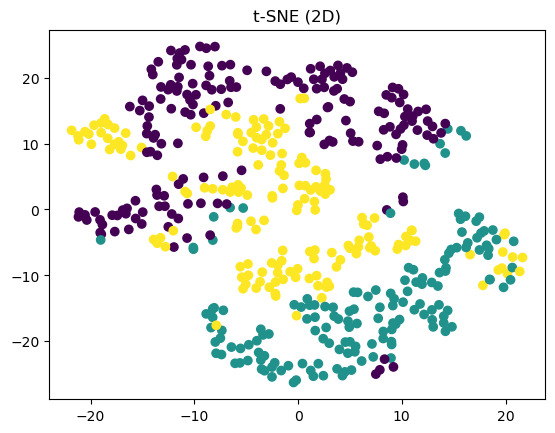

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ====================================================
# 1. Bias–Variance Tradeoff (Learning Curve Example)
# ====================================================
X = df[['Age','Quantity','Discount (%)','Ad_Spend']].values
y = df['Sales'].values

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="r2"
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train R²")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test R²")
plt.xlabel("Training Set Size"); plt.ylabel("R²")
plt.title("Bias–Variance Tradeoff (Learning Curve)")
plt.legend(); plt.grid(True); plt.show()

# ====================================================
# 2. Overfitting vs Underfitting
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print("Train R²:", model.score(X_train, y_train))
print("Test R² :", model.score(X_test, y_test))

# ====================================================
# 3. Feature Scaling
# ====================================================
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

X_std = scaler_std.fit_transform(X)
X_minmax = scaler_minmax.fit_transform(X)

print("Standardized (first row):", X_std[0])
print("Normalized (first row):", X_minmax[0])

# ====================================================
# 4. Cross-validation
# ====================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring="r2")
print("5-Fold CV mean R²:", cv_scores.mean())

# Stratified CV Example (classification)
Xc = df[['Age','Quantity','Discount (%)','Ad_Spend']].values
yc = df['Returned_flag'].values
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = LogisticRegression(max_iter=1000)
strat_scores = cross_val_score(clf, Xc, yc, cv=skf, scoring="accuracy")
print("Stratified CV mean Accuracy:", strat_scores.mean())

# ====================================================
# 5. Resampling
# ====================================================
boot_means = []
for _ in range(1000):
    sample = resample(y, replace=True, n_samples=len(y))
    boot_means.append(np.mean(sample))
print("Bootstrap mean estimate:", np.mean(boot_means))

# Jackknife (leave-one-out estimate)
jackknife_means = [(np.mean(np.delete(y, i))) for i in range(len(y))]
print("Jackknife mean estimate:", np.mean(jackknife_means))

# ====================================================
# 6. Confusion Matrix Metrics
# ====================================================
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
clf.fit(Xc_train, yc_train)
y_pred = clf.predict(Xc_test)

print("Accuracy :", accuracy_score(yc_test, y_pred))
print("Precision:", precision_score(yc_test, y_pred))
print("Recall   :", recall_score(yc_test, y_pred))
print("F1-score :", f1_score(yc_test, y_pred))

cm = confusion_matrix(yc_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(); plt.show()

# ====================================================
# 7. Clustering Measures
# ====================================================
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)
labels = kmeans.labels_
print("Silhouette Score:", silhouette_score(X_std, labels))
print("SSE (Inertia):", kmeans.inertia_)

# ====================================================
# 8. Dimensionality Reduction
# ====================================================
pca = PCA(n_components=2).fit_transform(X_std)
plt.scatter(pca[:,0], pca[:,1], c=labels, cmap="viridis")
plt.title("PCA (2D)")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_std)
plt.scatter(tsne[:,0], tsne[:,1], c=labels, cmap="viridis")
plt.title("t-SNE (2D)")
plt.show()

# Conclusion

## This project comprehensively covers all essential statistical concepts, from foundational principles to advanced methods, including correlation, regression, multivariate analysis, time series, Bayesian statistics, and machine learning metrics. By applying these techniques, we have transformed raw data into actionable insights, uncovered patterns, and solved complex, real-world problems.

## With this complete approach, the reader is now equipped to perform end-to-end data analysis, make informed decisions, and leverage data science tools confidently. This project serves as a mastery roadmap, bridging theory and practice, and providing a solid foundation for any advanced analytics endeavor.